In [279]:
# Import libraries
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

## Task 1: Probability

#### A. Plot the probability density function $p(x)$ of a one dimensional Gaussian distribution $\Nu(x; 1; 1)$

In [280]:
n = 1000
mu = 1
sigma_2 = 1
x = np.random.normal(mu, sigma_2, n)
pdf = norm.pdf(x)

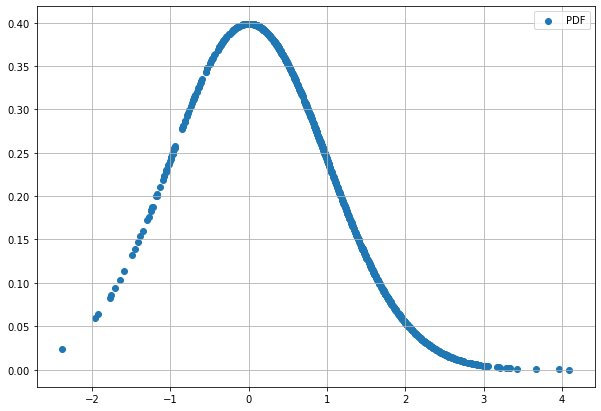

In [281]:
plt.figure(figsize=(10,7))
plt.scatter(x, pdf,label='PDF')
plt.legend()
plt.grid()

#### B. Calculate the probability mass that the random variable $X$ is less than 0, that is, $Pr\{X <= 0\} = \int^{0}_{-\infty}{p(x)dx}$

In [282]:
cdf = norm.cdf(x, loc=mu, scale=sigma_2)
p_mass = norm.cdf(0, loc=mu, scale=sigma_2)
print(f"P(X <= 0) = {p_mass:.4f}")

P(X <= 0) = 0.1587


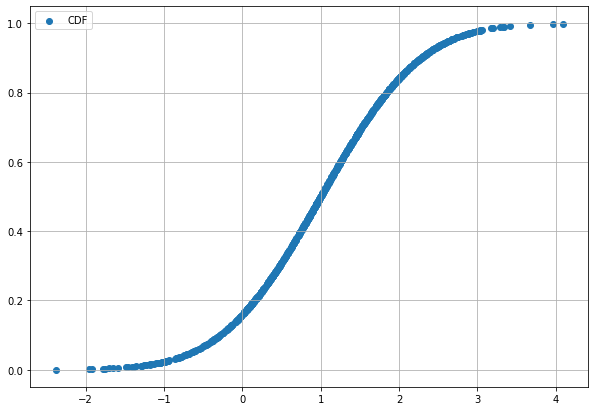

In [283]:
plt.figure(figsize=(10,7))
plt.scatter(x, cdf,label='CDF')
plt.legend()
plt.grid()

#### C. Consider the new observation variable $z$, it gives information about the variable $x$ by the likelihood function $p(z|x) = \Nu(z; x; \sigma^2)$, with variance $\sigma^2 = 0.2$. Apply the Bayes’ theorem to derive the posterior distribution, $p(x|z)$, given an observation $z = 0.75$ and plot it. For a better comparison, plot the prior distribution, $p(x)$, too.

In [284]:
z = 0.75
sigma_z_2 = 0.2
z_x = np.random.normal(z, sigma_z_2, n)
p_z_x = norm.pdf(z_x)

In [285]:
def p(x: float, mu: float, sigma_2: float) -> float:
    return np.exp(-0.5 * (x - mu) ** 2 / sigma_2) / np.sqrt(2 * np.pi * sigma_2)

In [286]:
p_x = p(x=z, mu=mu, sigma_2=sigma_2)
p_z = p(x=z, mu=z, sigma_2=sigma_z_2)
p_x_z = p_z_x * p_x / p_z

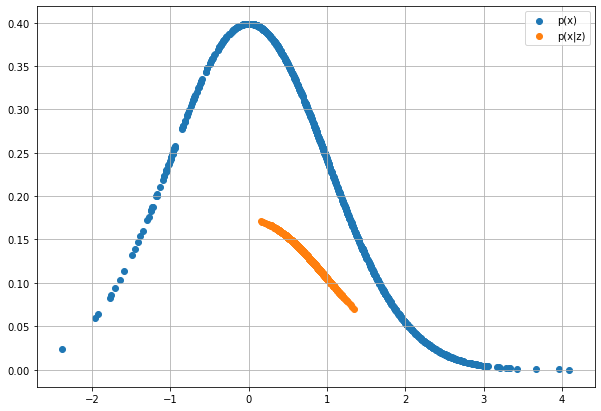

In [287]:
plt.figure(figsize=(10,7))
plt.scatter(x, pdf,label='p(x)')
plt.scatter(z_x, p_x_z,label='p(x|z)')
plt.legend()
plt.grid()